In [36]:
import numpy as np
import pandas as pd

In [37]:
df = pd.read_csv('/content/placement.csv')

In [38]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [40]:
df.shape

(100, 4)

In [41]:
df = df.iloc[:,1:]

In [42]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [43]:
import matplotlib.pyplot as plt


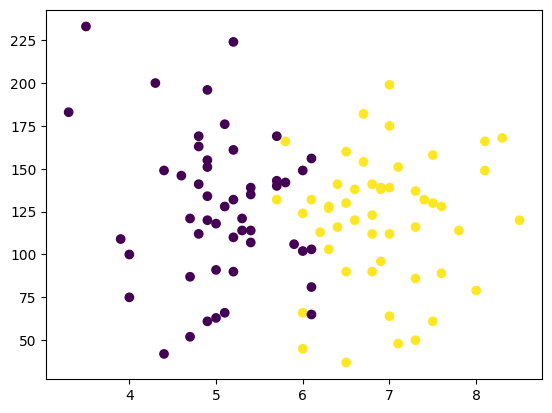

In [44]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [47]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [48]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [49]:
y.shape

(100,)

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [51]:
X_train

,cgpa,iq
17,3.3,183.0
9,5.1,66.0
81,5.4,107.0
83,7.5,130.0
20,6.6,120.0
...,...,...
37,8.1,149.0
48,6.6,138.0
76,4.9,155.0
88,4.4,149.0


In [52]:
y_train

,placement
17,0
9,0
81,0
83,1
20,1
...,...
37,1
48,1
76,0
88,0


In [53]:
X_test

,cgpa,iq
2,5.3,121.0
33,6.0,149.0
59,4.8,112.0
25,5.0,91.0
56,6.1,65.0
44,7.5,61.0
65,8.1,166.0
72,7.3,116.0
15,5.1,176.0
63,6.3,128.0


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
X_train = scaler.fit_transform(X_train)

In [57]:
X_train

array([[-2.3423073 ,  1.4708317 ],
       [-0.76519266, -1.45306066],
       [-0.50234022, -0.4284488 ],
       [ 1.33762686,  0.14633345],
       [ 0.54906954, -0.10357188],
       [-1.4661325 ,  1.89567076],
       [ 0.02336466, -0.55340147],
       [ 0.02336466, -0.00360974],
       [ 0.11098214,  0.19631452],
       [-0.94042762, -0.10357188],
       [ 0.63668702,  1.44584117],
       [-0.67757518,  2.49544355],
       [ 0.46145206,  0.89604944],
       [ 0.11098214, -0.52841094],
       [ 0.81192198, -0.70334467],
       [ 0.89953946,  0.37124825],
       [ 1.42524434,  0.09635239],
       [-0.85281014, -1.52803225],
       [-0.85281014, -0.15355294],
       [-1.0280451 ,  0.42122932],
       [-0.94042762,  0.24629559],
       [ 0.63668702,  0.74610625],
       [-1.0280451 ,  1.12096424],
       [ 0.37383458, -0.20353401],
       [ 0.89953946, -1.50304172],
       [-0.76519266,  0.09635239],
       [ 0.98715694, -1.90289025],
       [ 0.81192198,  0.34625772],
       [ 0.7243045 ,

In [59]:
X_test = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [60]:
X_test

array([[-5.75059021, -3.10439962],
       [-5.21321262, -3.08691287],
       [-6.13443136, -3.11002036],
       [-5.9808949 , -3.12313542],
       [-5.13644439, -3.13937312],
       [-4.06168919, -3.14187123],
       [-3.60107983, -3.07629592],
       [-4.21522565, -3.10752225],
       [-5.90412667, -3.07005065],
       [-4.98290793, -3.10002793]])

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
clf = LogisticRegression()

In [63]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [64]:
y_pred = clf.predict(X_test)

In [65]:
y_test

,placement
2,0
33,0
59,0
25,0
56,0
44,1
65,1
72,1
15,0
63,1


In [68]:
from sklearn.metrics import accuracy_score

COMPUTE THE PERFORMANCE

In [75]:
accuracy_score(y_test,y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.38        10
weighted avg       0.36      0.60      0.45        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


VISUALIZATION OF LOGISTIC REGRESSION

In [70]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

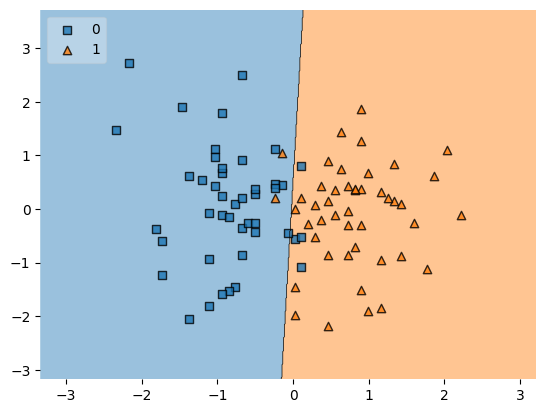

In [71]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [73]:
df.drop(columns=['Unnamed'], inplace=True, errors='ignore')
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Confusion Matrix:
[[13 13]
 [11 13]]


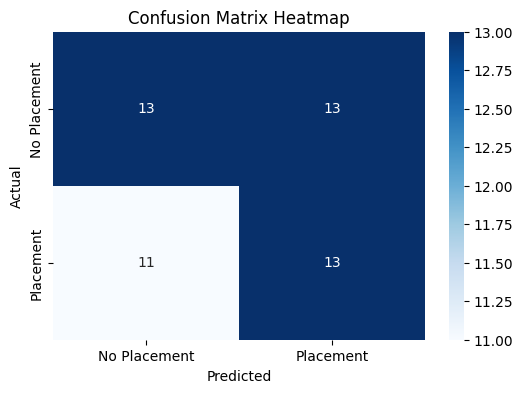

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load dataset (Replace with actual file)
df = pd.read_csv("placement.csv")

# Drop 'Unnamed' column (if it exists)
df = df.drop(columns=df.columns[df.columns.str.contains('^Unnamed', case=False)], errors='ignore')

# Replace these with actual labels and predictions from your model
y_test = np.random.randint(0, 2, 50)  # Replace with actual y_test
y_pred = np.random.randint(0, 2, 50)  # Replace with actual y_pred

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Placement", "Placement"], yticklabels=["No Placement", "Placement"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


COST FUNCTION

In [82]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost
